## This notebook contains Compound Descriptor calculation and EDA

- install rdkit using conda to compute molecular descriptors

- conda install -c rdkit rdkit -y

- Smiles data in the dataset is the information about molecular structure of the compound. rdkit will use this molecular structure information to derive the descriptors

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from rdkit import Chem

In [4]:
from rdkit.Chem import Descriptors, Lipinski

In [6]:
df = pd.read_csv('bioactivity_data_processed.csv')
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,Intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,Intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,Intermediate



### Calculate Lipinski descriptors

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

- Molecular weight < 500 Dalton
- Octanol-water partition coefficient (LogP) < 5
- Hydrogen bond donors < 5
- Hydrogen bond acceptors < 10

In [9]:
# creating a custom function inspired from: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski_descriptors(smiles, verbose=False):
    moldata = []
    for element in df['canonical_smiles']:
        mol = Chem.MolFromSmiles(element)
        moldata.append(mol)
    
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors



In [10]:
lipinski_descriptors(df['canonical_smiles'])

,MW,LogP,NumHDonors,NumHAcceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0
5,372.243,4.39330,0.0,3.0
6,311.337,3.76990,0.0,3.0
7,419.243,4.23540,0.0,3.0
8,327.792,4.28420,0.0,3.0
9,445.281,4.74860,0.0,3.0


In [11]:
df_lipinski = lipinski_descriptors(df['canonical_smiles'])

### Combining lipinski and original dataframe

In [13]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,Intermediate,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,Intermediate,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,Intermediate,338.344,3.53900,0.0,5.0


### Converting IC50 to pIC50

In [15]:
import seaborn as sns

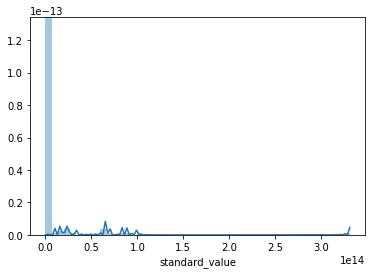

In [16]:
sns.distplot(df['standard_value']) #uneven distribution of standard value aka IC50.

- We need to get a more even distribution of IC50 values by converting it to negative logarithmic scale.

In [17]:
df['standard_value'].describe()

count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

- The standard values range from 5 - 3X10^14. We need to first normalize these values so that when log scale is applied, the values have a smaller range.

- We will first apply the a custom function so that the values in the standard_value column is normalized. We are capping the maximum value at 100,000,000

In [18]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [27]:
df_normalized = norm_value(df_combined)
df_normalized.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,Intermediate,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,Intermediate,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],Intermediate,338.344,3.53900,0.0,5.0,2000.0


In [20]:
df_normalized['standard_value_norm'].describe()

count    1.330000e+02
mean     2.110164e+07
std      4.089714e+07
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      1.000000e+08
Name: standard_value_norm, dtype: float64

- Now we use a custom function to convert to logarithmic scale

In [21]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [23]:
df_final = pIC50(df_normalized)
df_final.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,Intermediate,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,Intermediate,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],Intermediate,338.344,3.53900,0.0,5.0,5.698970


In [24]:
df_final['pIC50'].describe()

count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64

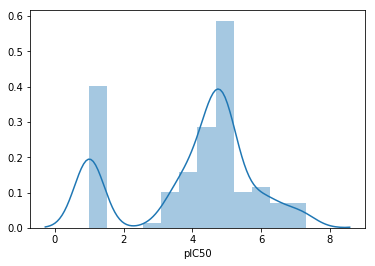

In [26]:
sns.distplot(df_final['pIC50']) #bimodal distribution of normalized, log transformed IC50 values

### Removing intermediate bioactivity class

- we only want to analyze compound's effictivness as active or inactive

In [34]:
df_2classes = df_final[df_final['bioactivity_class'] != 'Intermediate']
df_2classes.head()

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.6605,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.6308,0.0,3.0,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,Active,372.243,4.3933,0.0,3.0,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,Active,419.243,4.2354,0.0,3.0,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,Inactive,327.792,4.2842,0.0,3.0,4.950782


### EDA

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

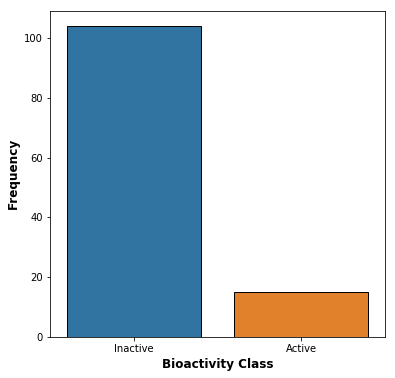

In [43]:
# distribution of bioactivity class

plt.figure(figsize=(6,6))
sns.countplot(df_2classes['bioactivity_class'], edgecolor='black')
plt.xlabel('Bioactivity Class', fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')
plt.show()

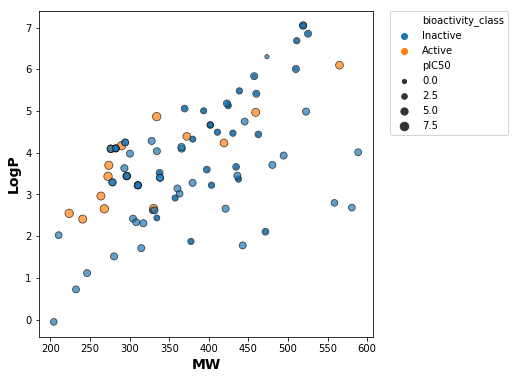

In [46]:
# scatter plot of MW vs LogP

plt.figure(figsize=(6,6))

sns.scatterplot(x=df_2classes['MW'], y=df_2classes['LogP'], hue=df_2classes['bioactivity_class'], size=df_2classes['pIC50'], edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

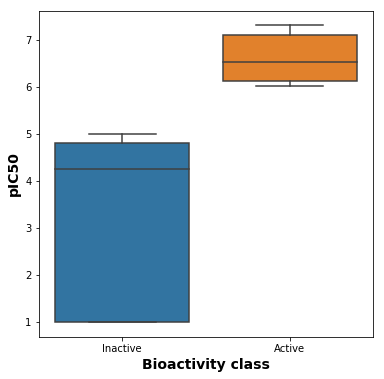

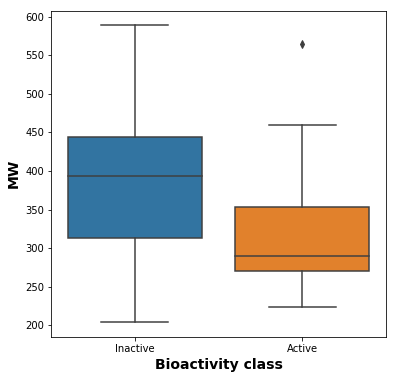

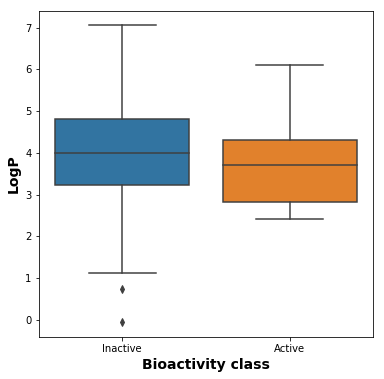

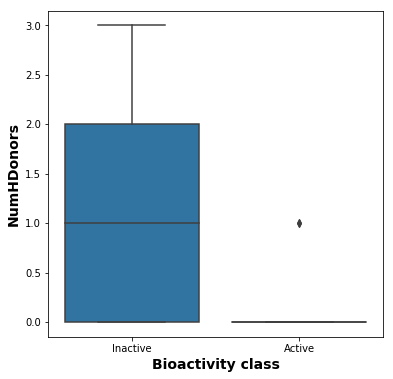

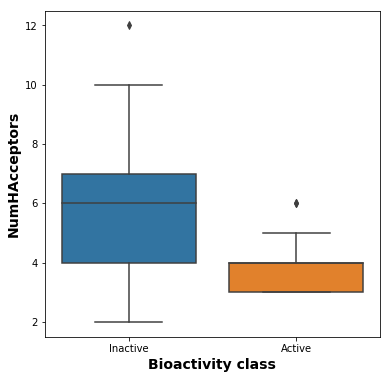

In [59]:
# distribution of other descriptors

column = ['pIC50', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors']

for col in df_2classes[column]:
    plt.figure(figsize=(6,6))

    sns.boxplot(x =df_2classes['bioactivity_class'], y =df_2classes[col])

    plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
    plt.ylabel(col, fontsize=14, fontweight='bold')

In [60]:
# exporting the dataframe to csv

df_2classes.to_csv('bioactivity_data_processed_pIC50_2classes.csv', index=False)